In [143]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sriharshaeedala_financial_fraud_detection_dataset_path = kagglehub.dataset_download('sriharshaeedala/financial-fraud-detection-dataset')

print('Data source import complete.')


Data source import complete.


In [144]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [145]:
# reading the dataset
df = pd.read_csv("/content/Synthetic_Financial_datasets_log.csv")

In [ ]:
# printing the data
df.head()

In [ ]:
# print the shape of the data
df.shape

In [148]:
# printing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423045 entries, 0 to 423044
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            423045 non-null  int64  
 1   type            423045 non-null  object 
 2   amount          423045 non-null  float64
 3   nameOrig        423045 non-null  object 
 4   oldbalanceOrg   423044 non-null  float64
 5   newbalanceOrig  423044 non-null  float64
 6   nameDest        423044 non-null  object 
 7   oldbalanceDest  423044 non-null  float64
 8   newbalanceDest  423044 non-null  float64
 9   isFraud         423044 non-null  float64
 10  isFlaggedFraud  423044 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 35.5+ MB


In [149]:
# describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,423045.000000,4.230450e+05,4.230440e+05,4.230440e+05,4.230440e+05,4.230440e+05,423044.000000,423044.0
mean,13.005207,1.715082e+05,9.016937e+05,9.212669e+05,9.839946e+05,1.177147e+06,0.000513,0.0
std,3.335075,2.828329e+05,2.962515e+06,2.999694e+06,2.349545e+06,2.539244e+06,0.022643,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,10.000000,1.349810e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,13.000000,8.193778e+04,1.827250e+04,0.000000e+00,1.084914e+05,2.179228e+05,0.000000,0.0
75%,16.000000,2.286095e+05,1.729825e+05,2.144470e+05,8.893285e+05,1.218573e+06,0.000000,0.0
max,18.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [150]:
# checking the missing values in the data
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [151]:
# printing unique values counts for each column
for col in df.columns:
    print(f"Unique values for column {col}")
    print(df[col].value_counts())
    print("======================================================")

Unique values for column step
step
15    44609
17    43361
16    42471
14    41485
9     37628
13    37515
11    37241
12    36153
10    35991
18    31493
8     21097
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: count, dtype: int64
Unique values for column type
type
CASH_OUT    152756
PAYMENT     140697
CASH_IN      91629
TRANSFER     34931
DEBIT         3032
Name: count, dtype: int64
Unique values for column amount
amount
764.38       4
706.25       4
9217.19      4
8153.54      4
8683.35      3
            ..
35500.82     1
362409.30    1
580370.15    1
255718.31    1
292803.38    1
Name: count, Length: 417079, dtype: int64
Unique values for column nameOrig
nameOrig
C18060993      2
C44568807      2
C119887223     2
C133857826     2
C457997071     2
              ..
C1589785814    1
C606662156     1
C842711913     1
C2058672494    1
C29            1
Name: count, Length: 423011, dtype: int64
Unique values for column oldbalanceOrg
oldbalance

In [152]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


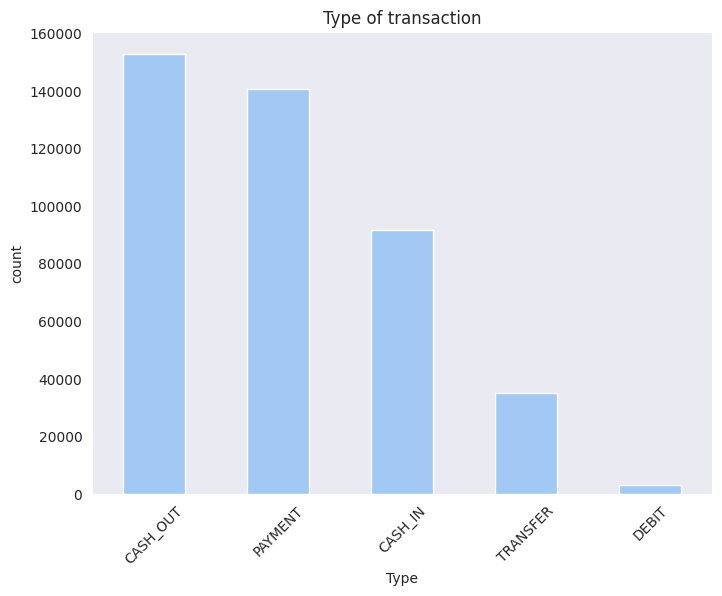

In [153]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'bar')
plt.title('Type of transaction')
plt.xticks(rotation = 45)
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

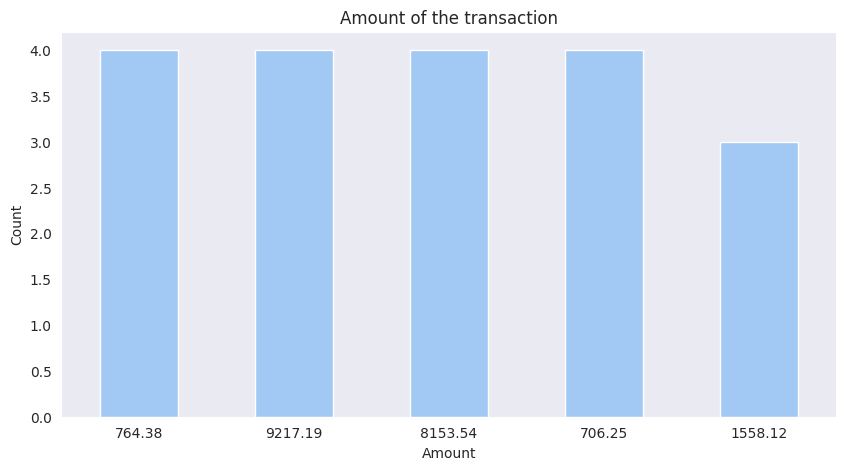

In [154]:
# Transaction amount
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (10,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title("Amount of the transaction")
plt.xticks(rotation = 0)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

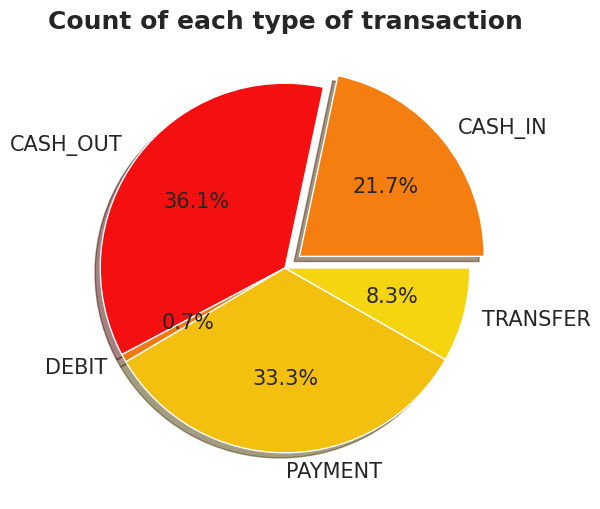

In [155]:
df.groupby('type').count()['amount']
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

In [156]:
df.groupby(['type','isFraud']).count()

step  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                            
CASH_IN  0.0       91629   91629     91629          91629           91629   
CASH_OUT 0.0      152643  152643    152643         152643          152643   
         1.0         112     112       112            112             112   
DEBIT    0.0        3032    3032      3032           3032            3032   
PAYMENT  0.0      140697  140697    140697         140697          140697   
TRANSFER 0.0       34826   34826     34826          34826           34826   
         1.0         105     105       105            105             105   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0.0         91629           91629           91629           91629  
CASH_OUT 0.0        152643          152643          152643          152643  
         1.0           112             112             112             112  
DEBIT    0.0          3032            3032            3032            3032  
PAYMENT  0.0        140697          140697          140697          140697  
TRANSFER 0.0         34826           34826           34826           34826  
         1.0           105             105             105             105

In [157]:
# selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

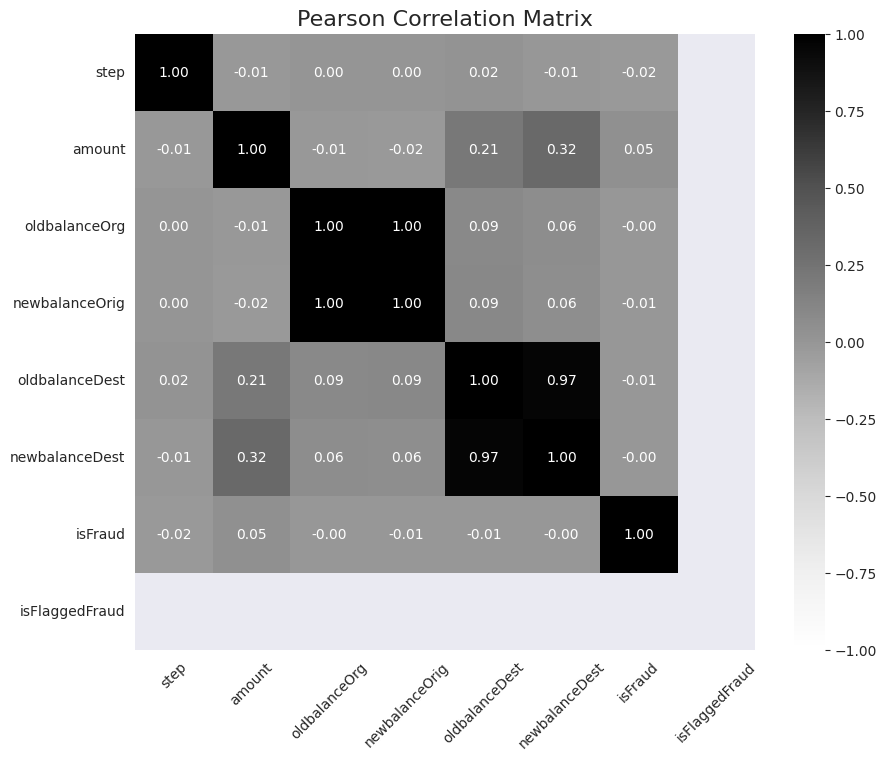

In [158]:
# visulaising the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

In [159]:
# Removing the columns that are not necessary for the data modeling
# the columns that are not necessary are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)

In [160]:
# nameDest and nameOrig can also be removed
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [161]:
# printing the data frame after removing the columns
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0.0,0.0
1,1,PAYMENT,1864.28,0.0,0.0
2,1,TRANSFER,181.00,1.0,0.0
3,1,CASH_OUT,181.00,1.0,0.0
4,1,PAYMENT,11668.14,0.0,0.0


In [162]:
# encoding the categorical column into numerical data
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [163]:
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [164]:
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [165]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [166]:
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

# Impute or remove missing values before scaling
# Option 1: Impute with the mean
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean') # You can use other strategies like 'median' or 'most_frequent'
# X = imputer.fit_transform(X)

#Option 2: Remove rows with missing values
X = X.dropna()
y = y[X.index] # Update y to match the rows in X after dropping NaNs


# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# make an object of logistic regression
lr = LogisticRegression()

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

Linear Regression

In [167]:
# make an object of logistic regression
lr = LogisticRegression()

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

In [168]:
# testing the model on test data
y_pred = lr.predict(X_test)

# calculating the performance matrix

#accuracy of the logistic regression
accuracy_lr = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_lr = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_lr = recall_score(y_test, y_pred)

# classification report
classification_lr = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of logistic regression {accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Accuracy of logistic regression 0.9994720834580897
Precision of logistic regression 0.0
Recall of logistic regression 0.0
Classification Report of logistic regression
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    126847
         1.0       0.00      0.00      0.00        67

    accuracy                           1.00    126914
   macro avg       0.50      0.50      0.50    126914
weighted avg       1.00      1.00      1.00    126914



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Gradient Boosting
- Using XGBoost
- works by building an ensemble (a group) of weak learners, typically decision trees, to form a strong learner.

In [169]:
# Importing Gradient Boosting library
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test split (assuming X_train, X_test, y_train, y_test are already defined)

scale_pos_weight = len(y_train) / sum(y_train)

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(
    max_depth=6,               # Maximum tree depth
    learning_rate=0.1,         # Step size for weight updates
    n_estimators=100,          # Number of boosting rounds
    scale_pos_weight=1,        # Adjust for class imbalance
    eval_metric='logloss',     # Evaluation metric for training
    use_label_encoder=False    # Disable label encoding warnings
)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:26:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [170]:
#accuracy of the logistic regression
accuracy_gb_og = accuracy_score(y_test, y_pred_xgb)

# precision of the logistic regression
precision_gb_og = precision_score(y_test, y_pred_xgb)

# recall of the logistic regression
recall_gb_og = recall_score(y_test, y_pred_xgb)

# Evaluate the model
print("XGBoost Classifier Results:")
print(f"Accuracy: {accuracy_gb_og}")
print(f"Precision: {precision_gb_og}")
print(f"Recall: {recall_gb_og}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier Results:
Accuracy: 0.9995193595663205
Precision: 0.75
Recall: 0.13432835820895522
Confusion Matrix:
[[126844      3]
 [    58      9]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    126847
         1.0       0.75      0.13      0.23        67

    accuracy                           1.00    126914
   macro avg       0.87      0.57      0.61    126914
weighted avg       1.00      1.00      1.00    126914



Hyperparameter tuning

In [171]:
!pip install --upgrade xgboost

In [172]:
!pip install scikit-learn==1.5.2

RandomizedSearch insetad of grid

Decision Tree

In [173]:
# make an object of logistic regression
sv = DecisionTreeClassifier(max_depth = 20)

#fitting the trainig data into lr model
sv.fit(X_train, y_train)

# testing the model on test data
y_pred = sv.predict(X_test)

# calculating the performance matrix

#accuracy of the logistic regression
accuracy_sv = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_sv = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_sv = recall_score(y_test, y_pred)

# classification report
classification_sv = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of Decision Tree {accuracy_sv}")
print(f"Precision of Decision Tree {precision_sv}")
print(f"Recall of Decision Tree {recall_sv}")
print(f"Classification Report of Decision Tree\n {classification_sv}")

Accuracy of Decision Tree 0.9992199442141922
Precision of Decision Tree 0.22413793103448276
Recall of Decision Tree 0.19402985074626866
Classification Report of Decision Tree
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    126847
         1.0       0.22      0.19      0.21        67

    accuracy                           1.00    126914
   macro avg       0.61      0.60      0.60    126914
weighted avg       1.00      1.00      1.00    126914



In [174]:
# prompt: ADD TO THIS MODEL TO F1 SCORE

from sklearn.metrics import f1_score

# ... (Your existing code) ...

# Calculate F1 score for Logistic Regression
f1_lr = f1_score(y_test, y_pred)
print(f"F1 Score of logistic regression {f1_lr}")

# Calculate F1 score for XGBoost
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"F1 Score of XGBoost {f1_xgb}")

# Calculate F1 score for Decision Tree
f1_sv = f1_score(y_test, y_pred)
print(f"F1 Score of Decision Tree {f1_sv}")

F1 Score of logistic regression 0.208
F1 Score of XGBoost 0.22784810126582278
F1 Score of Decision Tree 0.208


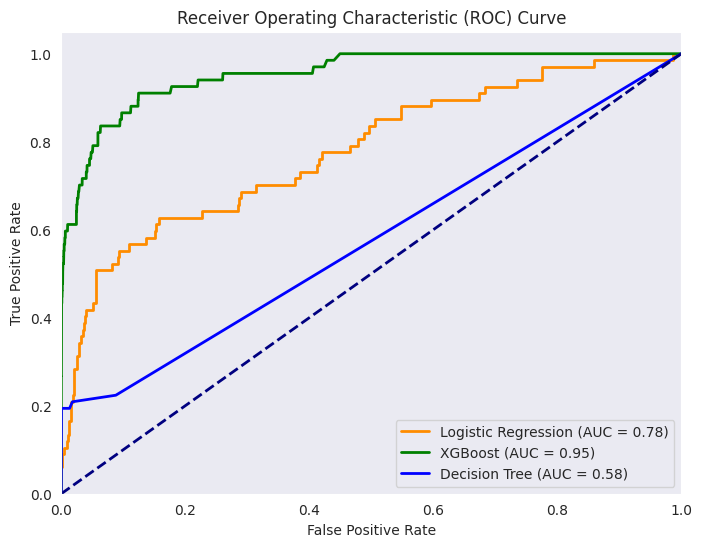

In [175]:
# prompt: ADD TO THIS MODEL FIND OUT THE AUC-ROC GRAPH IN VISUAL

from sklearn.metrics import roc_curve, auc

# ... (Your existing code) ...

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, sv.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)


# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()